In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 28)
pd.set_option('display.max_columns', 28)

# 1. mnist 데이터 설명

- mnist 데이터는 0에서 9까지 손으로 그린 숫자의 회색조 이미지가 포함된 데이터 세트이다.
- 컬럼 'label'은 해당 픽셀 데이터가 어떤 숫자를 나타내는지 알려준다.
- 'pixel' 컬럼들은 손글씨를 픽셀데이터로 저장한 값들. 각 이미지의 높이는 28픽셀, 너비는 28 픽셀로 총 784픽셀로 구성되어있고 각 픽셀에는 밝기 또는 어둡기를 나타내는 0에서 255까지의 정수가 들어있음.

- 이미지에서 원하는 픽셀을 찾으려면 x = i * 28 + j로 계산하면 됨..


이 데이터의 목적은 픽셀데이터를 통해 label을 예측하는 것. accuracy를 높이는 것이 목표
- 캐글의 평가 지표는 Accuracy(정확도)이다.

### 데이터 읽어오기

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28440,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 데이터 길이 확인
테이블명.shape : (행 row, 열 column)의 개수 출력

In [130]:
train.shape, test.shape, submission.shape

((42000, 785), (28000, 784), (28000, 2))

### 데이터 column 확인

In [133]:
print(train.columns)
print(test.columns)
print(submission.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
Index(['ImageId', 'Label'], dtype='object')


train테이블은 42000개의 row, 785개의 column으로 구성되어있고 'label'과 'pixel'데이터가 모두 있습니다.

test테이블은 'label' 컬럼이 없이 픽셀 데이터로만 이루어져있고 이러한 test데이터를 이용해 submission테이블에 답을 채워 제출해야합니다.

In [10]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
submission.head()

,ImageId,Label
0,1,5
1,2,0
2,3,5
3,4,0
4,5,0


### 데이터가 어떻게 생겼을까요?

In [11]:
# 일단 따라해보세요
train.iloc[0, 1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
           ..
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

iloc[0, 1:] 첫번째 row, column은 두번째부터 끝까지 가져옵니다. column이 두번째부터인 이유는 'label' column을 제외하고 가져오기 위해서입니다.

In [12]:
train.iloc[0, 1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

train.iloc[0, 1:].values 는 series형태의 데이터를 array타입으로 바꿔준다. array타입으로 바꾸는 것은 reshape해주기 위해서입니다.

In [13]:
train.iloc[0, 1:].values.reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

train.iloc[0, 1:].values.reshape(28, 28) 이렇게 해주면 array형태의 데이터를 길이가 28인 array로 28개 만들어줍니다.

위의 과정을 모두 적용한 것이 밑의 것.
mnist데이터는 이렇게 숫자의 글씨체를 28*28 = 784개의 픽셀로 저장한 값입니다.
자세히 보면 데이터가 8의 형태를 띄고 있으며 0에서 255사이의 값이 들어가있습니다.
이러한 픽셀 데이터가 42000개 들어가있는 것이 train데이터입니다.

In [14]:
label_sample_image = train.iloc[10, 1:].values.reshape(28, 28)
pd.DataFrame(label_sample_image)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,7,24,24,97,253,253,253,253,255,180,48,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,30,186,252,252,253,252,252,252,252,253,252,227,29,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,38,155,252,252,252,253,252,252,227,79,222,252,252,129,0,0,0,0
9,0,0,0,0,0,0,0,0,0,85,233,252,252,252,252,253,252,252,202,11,180,252,252,119,0,0,0,0


## submission과 test 데이터프레임 concat

In [22]:
df = pd.concat([submission, test], axis = 1)

test 데이터와 submission 데이터를 이어붙여주는 역할을 하는 것이 concat입니다. axis = 1을 해줘야 옆으로 붙습니다. 
axis = 0이 기본값이며 이 경우에는 아래로 붙습니다.

# 2.가장 간단한 예측하기

### 2.1 모두 5으로 예측해보기

In [23]:
df['Label'] = 5

In [24]:
#Label에 5 들어간 것 확인하기
df.sample()

,ImageId,Label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4765,4766,5,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2.2 캐글 같이 제출해보기

In [25]:
submission['Label'] = df['Label']

In [26]:
#데이터프레임 csv로 내보내기, 반드시 index = False 있어야함. 안그러면 제출 안돼
submission.to_csv('submission1.csv', index= False)

https://www.kaggle.com/c/digit-recognizer/overview 로 들어가서 'submit predictions'을 누르고 step1에서 파일을 업로드한 후 step2에 아무 내용을 적어줍니다. 
그 후에 make submission을 눌러서 제출해줍니다.
모두 5로 예측한 경우에는 accuracy가 0.08957이 나왔습니다. 앞으로의 목표는 탐색적 분석과 머신러닝을 통해서 kaggle 채점 결과 점수(accuracy)를 높이는 것입니다.

# 3. 탐색적 데이터 분석하기, 분석 결과를 바탕으로 예측하기

### 간단한 데이터 시각화해보기

Text(0.5, 1.0, 'label:1')

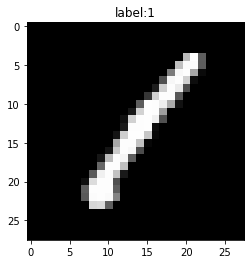

In [27]:
# 첫번째 숫자 시각화하기
plt.imshow(train.iloc[0, 1:].values.reshape(28,28), cmap='gray')
plt.title('label:{}'.format(train.iloc[0, 0]))

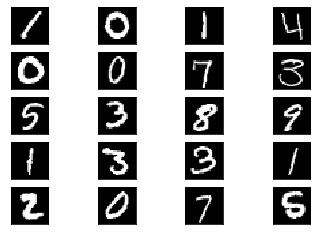

In [28]:
for row in range(20):
    i = row+1
    plt.subplot(5,4, i)
    pixels = train.iloc[row, 1:].values.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [29]:
#train['label']

In [30]:
#label 별로 카운트
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

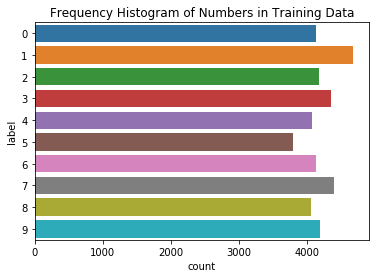

In [128]:
sns.countplot(y='label', data=train)
plt.title("Frequency Histogram of Numbers in Training Data")
plt.show()

## 가운데 네개 셀에 값을 가지고 있는 label은 뭘까?

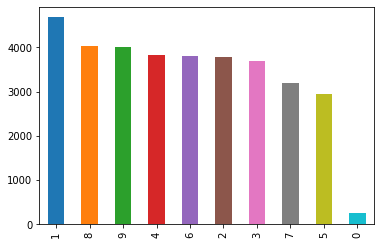

In [137]:
train[(train['pixel434'] !=0)| (train['pixel435'] !=0)|(train['pixel406'] !=0)| (train['pixel407'] !=0)]['label'].value_counts().plot(kind='bar')

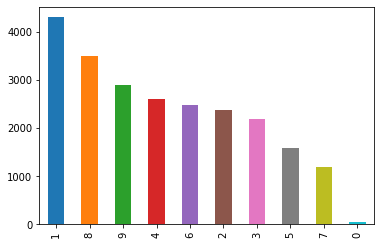

In [136]:
train[(train['pixel434'] !=0)& (train['pixel435'] !=0)&(train['pixel406'] !=0)& (train['pixel407'] !=0)]['label'].value_counts().plot(kind='bar')

- 1이 가장 많고 , 0이 가장 적다.

### 0부터 255까지 값들이 몇개씩 들어있는지 분포 알아보기

In [33]:
count255 = np.ravel(train.iloc[:, 1:].values).tolist()

In [34]:
# 오래 걸리니 주의하세요
count255_dic = {i:count255.count(i) for i in range(0, 256)}

In [35]:
count255_dic.values()

dict_values([26621312, 16170, 23601, 25196, 26733, 27358, 26188, 27363, 21668, 26703, 24799, 25025, 21308, 27957, 18903, 20090, 20193, 19216, 18992, 23983, 21095, 24903, 19141, 15953, 17927, 20918, 16860, 16742, 17844, 25924, 15890, 18291, 20182, 11018, 13932, 15182, 15479, 17357, 18369, 12632, 14442, 18851, 15600, 14909, 13305, 14729, 12111, 16861, 13812, 12477, 17009, 17509, 10245, 13448, 12670, 12624, 16196, 22260, 10089, 12587, 12557, 12652, 13840, 16794, 32934, 10993, 12350, 11186, 11483, 11762, 13542, 12961, 11996, 13471, 9671, 11122, 12388, 9404, 12303, 12589, 11019, 11679, 14921, 10708, 18847, 17659, 18136, 8999, 11184, 12340, 8944, 12623, 12969, 12121, 11550, 11483, 12338, 9924, 11512, 12535, 10644, 9913, 15408, 10358, 11398, 10476, 12798, 11549, 12576, 12888, 11147, 11168, 12787, 14086, 17074, 10598, 13659, 10294, 11606, 10877, 11514, 12229, 11528, 12620, 9525, 11461, 11663, 11513, 52883, 11558, 12374, 13350, 13116, 10510, 10822, 11595, 11285, 12218, 11965, 13639, 12180, 1898

In [36]:
count255_df = pd.DataFrame(list(count255_dic.items()), columns = ['range', 'count'])

In [37]:
count255_df.sort_values('count', ascending = False)

,range,count
0,0,26621312
253,253,1066447
254,254,560067
252,252,465950
255,255,223310
251,251,78319
128,128,52883
250,250,40161
191,191,36594
64,64,32934


보시는 바와 같이 0이 압도적으로 많고 250 이후부터 값의 수가 급격히 증가하는 걸 볼 수 있습니다.

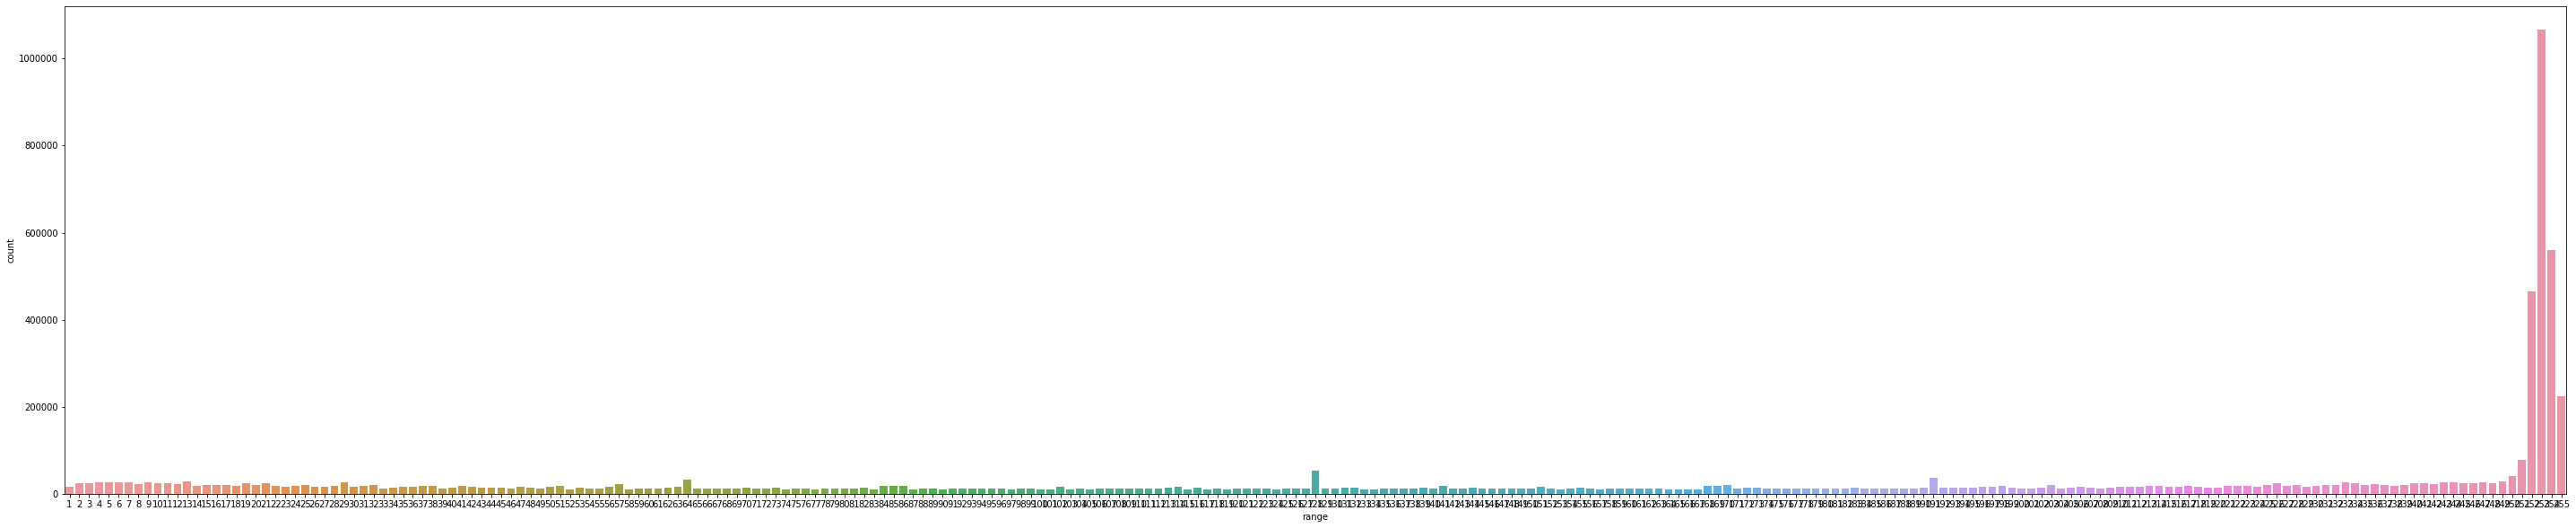

In [38]:
plt.figure(figsize=(50, 10))
sns.barplot(x="range", y="count", data=count255_df.iloc[1:,:])

0을 제외하고 seaborn을 이용해 barplot을 그리면 이런 모습입니다. 250 이후부터 도드라지게 증가합니다.

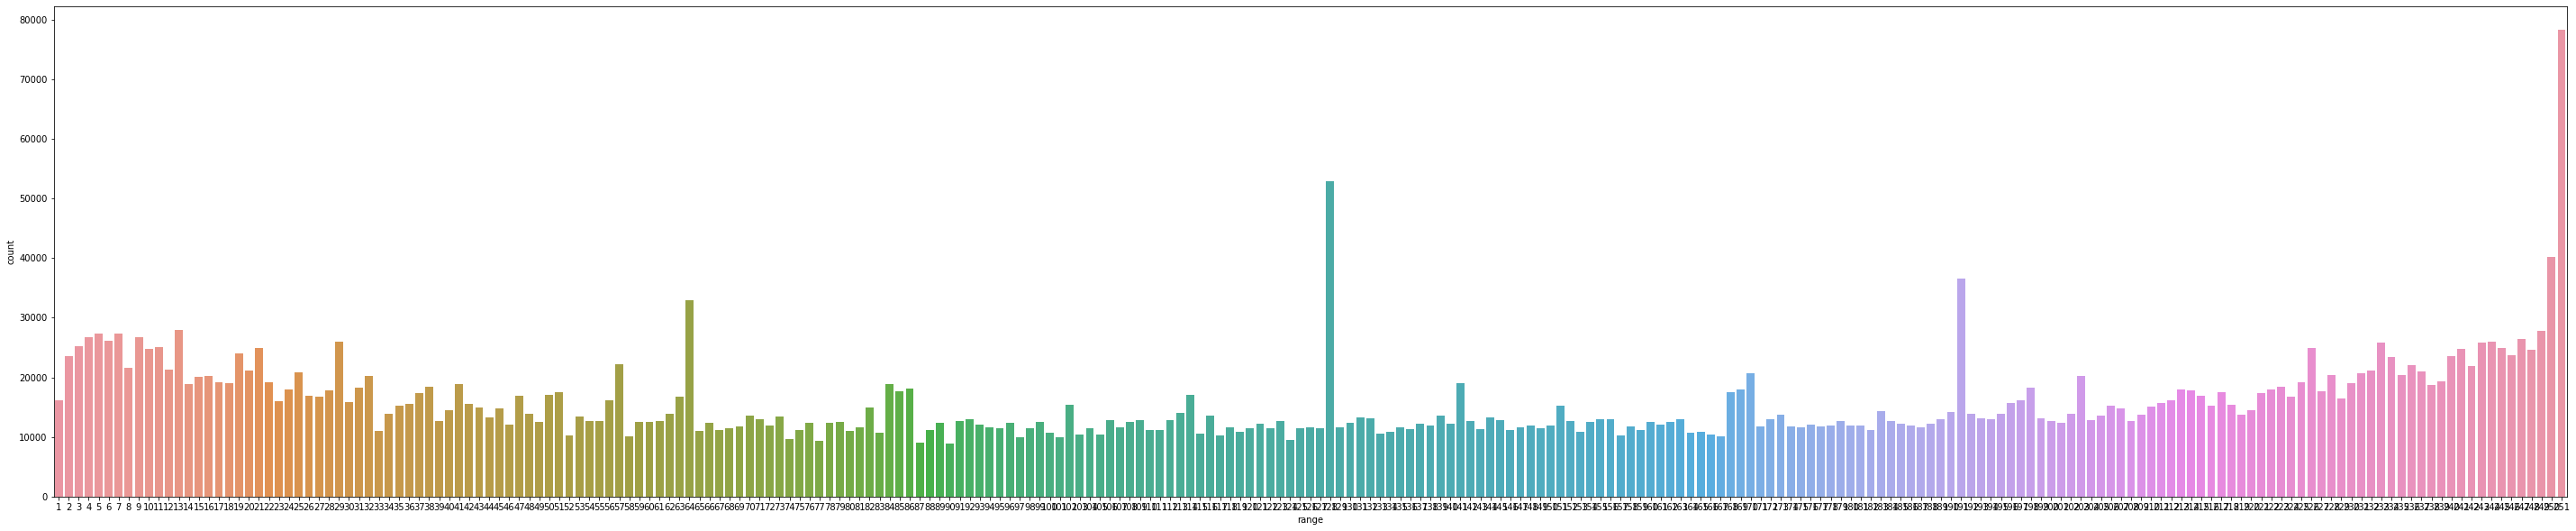

In [39]:
plt.figure(figsize=(50, 10))
sns.barplot(x="range", y="count", data=count255_df.iloc[1:252,:])

이번에는 1부터 251까지의 값으로만 그래프르 그려보았습니다. 128의 수가 많은 것이 도드라집니다.

### 0을 구성하고 있는 픽셀들의 분포

In [40]:
train_zero = train[train['label'] ==0].drop(columns = 'label')

In [41]:
train_zero.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
train_zero_mean = train_zero.mean().reset_index().rename(columns = {0: 'mean', 'index':'pixel'})

In [86]:
train_zero_mean

,pixel,mean
0,pixel0,0.0
1,pixel1,0.0
2,pixel2,0.0
3,pixel3,0.0
4,pixel4,0.0
5,pixel5,0.0
6,pixel6,0.0
7,pixel7,0.0
8,pixel8,0.0
9,pixel9,0.0


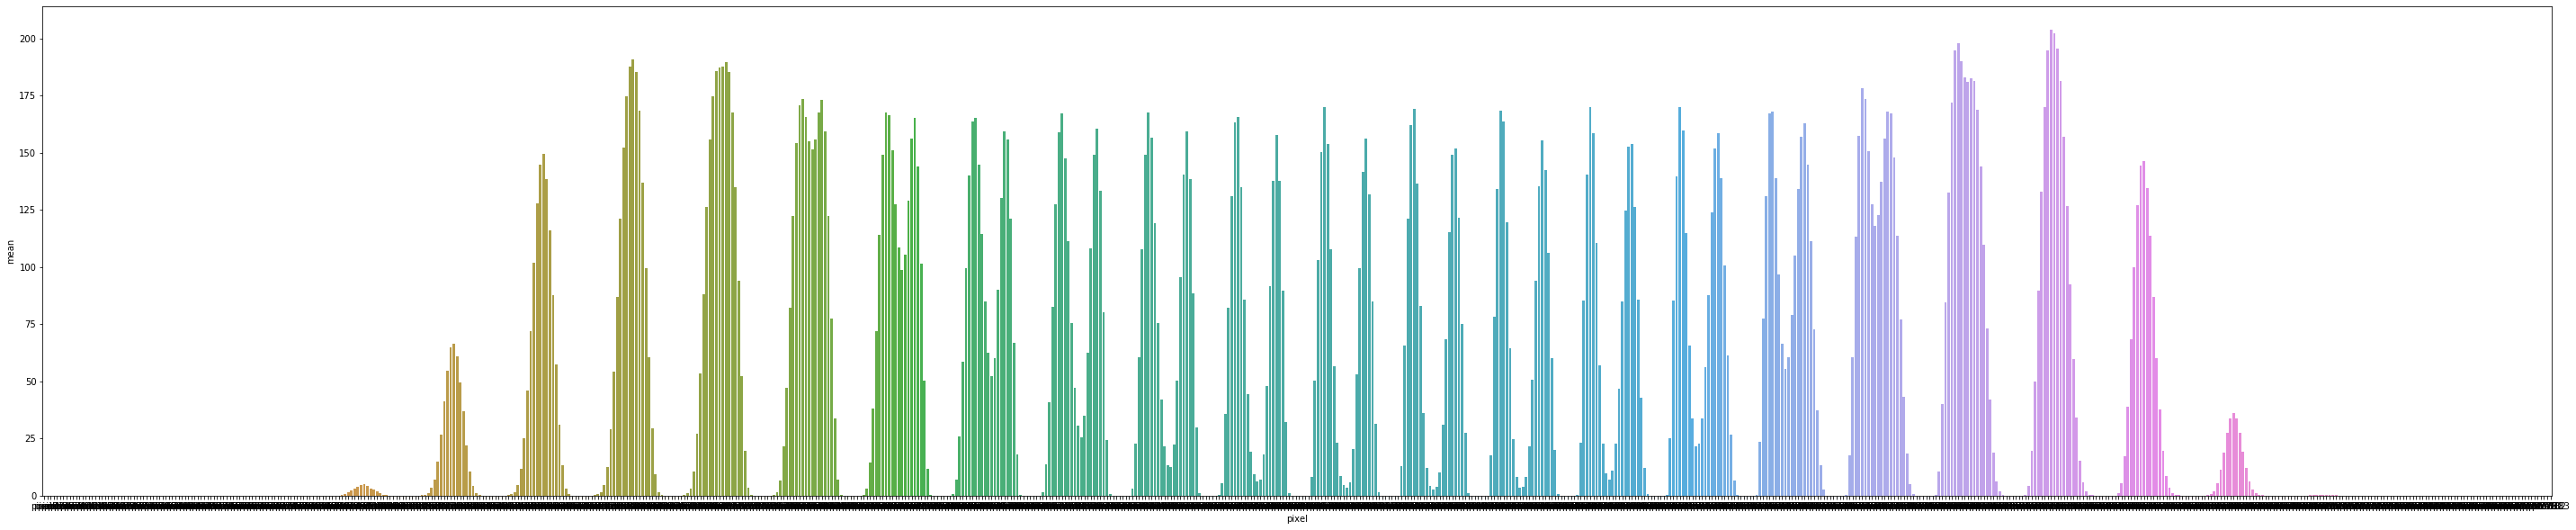

In [87]:
plt.figure(figsize=(50, 10))
sns.barplot(x="pixel", y="mean", data=train_zero_mean)

### 전체를 구성하고 있는 pixel들의 값의 평균 분포

In [88]:
pixel_mean = train.iloc[:, 1:].mean().reset_index().rename(columns = {'index': 'pixel', 0:'mean'})

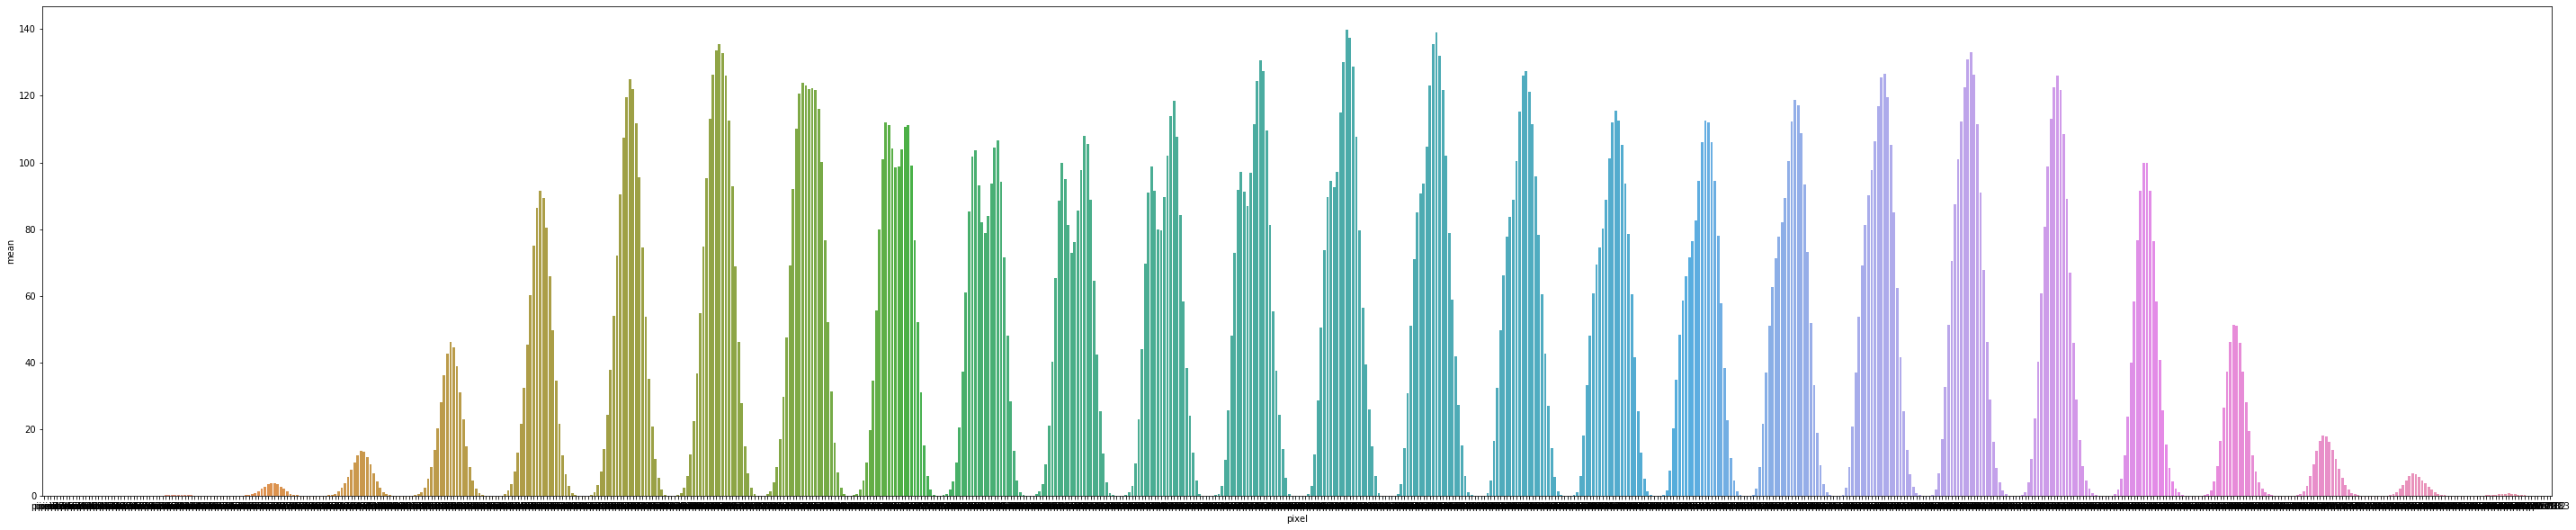

In [89]:
plt.figure(figsize=(50, 10))
sns.barplot(x="pixel", y="mean", data=pixel_mean)

## 히트맵으로 각 라벨별 특징 파악하기

### 첫번째 행으로 히트맵 그려보기

In [120]:
first_heatmap = train.iloc[8, 1:].values.reshape(28,28)

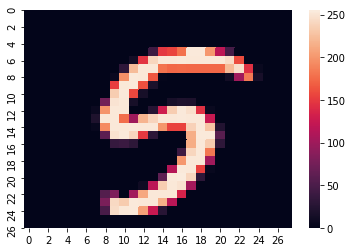

In [121]:
sns.heatmap(first_heatmap)

### 각 라벨의 픽셀별 평균값으로 히트맵 그리기

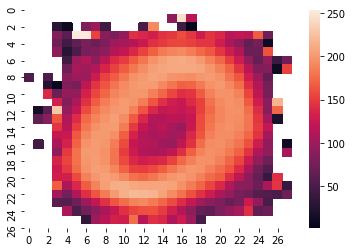

In [123]:
label_zero = train_zero[train_zero !=0].mean().values
label_zero_image = label_zero.reshape(28, 28)
sns.heatmap(label_zero_image)
# 평균으로

실제로 0은 가운데 픽셀이 거의 비어있음

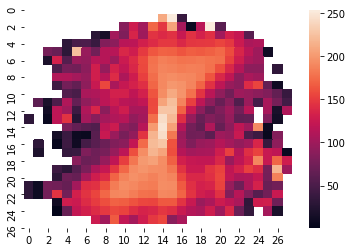

In [64]:
train_one = train[train['label'] == 1]
label_one = train_one[train_one !=0].iloc[:, 1:].mean().values
label_one_image = label_one.reshape(28, 28)
sns.heatmap(label_one_image)

'label'이 1인 

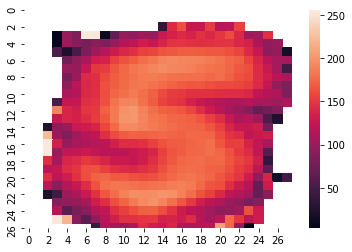

In [124]:
train_five = train[train['label'] == 5]
label_five = train_five[train_five !=0].iloc[:, 1:].mean().values
label_five_image = label_five.reshape(28, 28)
sns.heatmap(label_five_image)

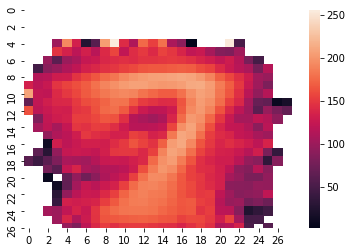

In [66]:
train_seven = train[train['label'] == 7]
label_seven = train_seven[train_seven !=0].iloc[:, 1:].mean().values
label_seven_image = label_seven.reshape(28, 28)
sns.heatmap(label_seven_image)

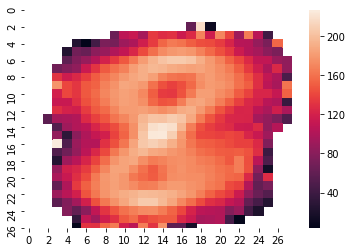

In [67]:
train_eight = train[train['label'] == 8]
label_eight = train_eight[train_eight !=0].iloc[:, 1:].mean().values
label_eight_image = label_eight.reshape(28, 28)
sns.heatmap(label_eight_image)

## 가운데 픽셀들이 비어있으면 0으로 예측하기, 가운데 픽셀들이 채워져있으면 1로 예측하기

In [68]:
for i in range(len(df)):
    if df.iloc[i][406] ==0 & df.iloc[i][407] == 0 & df.iloc[i][434] ==0 & df.iloc[i][435] == 0:
        df['Label'][i] = 0

In [69]:
for i in range(len(df)):
    if df.iloc[i][406] !=0 & df.iloc[i][407] != 0 & df.iloc[i][434] !=0 & df.iloc[i][435] != 0:
        df['Label'][i] = 1

In [70]:
submission['Label'] = df['Label']

In [71]:
submission.to_csv('submission2.csv', index= False)

위의 값(0.08957)에서 0.14871로 오른 것을 알 수 있다. 이렇게 탐색적 분석을 통해서도 정확도를 높일 수 있습니다. 더 많은 특징을 찾을수록 더 많이 맞출 수 있습니다. mnist데이터는 라벨별로 또 어떤 특징이 있을까요?

# 당신의 탐색적 분석을 해보세요.
1.Label 8은 공통적으로 어떤 pixel이 0일까요? Hint: 8은 동그라미가 두개인 숫자

2.0의 가운데는 어느 범위까지 비어있을까요? Hint: 과연 가운데 네개 픽셀만 비어있을까요?